# ALF Tutorial for $\lambda$ Dynamics Workshop

In [1]:
import alf
import os, subprocess, shutil
import numpy as np
alf_tutorial_dir=os.getcwd()

## I. Statement of the Problem

ALF estimates free energy differences between physical states drawn from an equilibrium distribution using a histogram based estimator. States with $\lambda>0.99$ are counted as $\lambda=1$. The number of times a state is observed gives its probability $P_i$, which can be converted to a free energy:
$$ G=-kT\ln(P_i)$$

The assumption of equilibrium gives rise to two problems
* If states differ in free energy by more than 2-3 kcal/mol, higher free energy states will not be sampled enough to accurately estimate their probability
* If there are barriers or traps between physical states of height $\Delta G^{\ddagger}$, the rate ($k$) of coming to equilibrium slows down exponentially
$$ k \propto \exp(-\Delta G^{\ddagger}/k_BT)$$

The solution to these problems is to flatten the alchemical space as a function of the alchemical coordinates $\lambda$ to maximize the rate of convergence of the simulations

## II. Test System: 1,4-substituted-benzene Solvation Free Energy

Solvation free energy of 1,4-substituted-benzene. Focus on vacuum side of solvation free energy to obtain quick results.
* 5 substituents at first site
* 6 substituents at second site (omit carboxylic acid due to protonation changes)

Several experimental results are available from early SAMPL challenges

<img src="Figures/14benz/14benz.jpeg" alf="1,4-benzene" width=250/>

Note: site 2 is mislabeled in this diagram. $\lambda_{21}$ is correct, switch $\lambda_{22}$ and $\lambda_{27}$, switch $\lambda_{23}$ and $\lambda_{26}$, and switch $\lambda_{24}$ and $\lambda_{25}$.

JZ Vilseck, X Ding, RL Hayes, & CL Brooks III. Generalizing the Discrete Gibbs Sampler-Based $\lambda$-Dynamics Approach for Multisite Sampling of Many Ligands. JCTC 17:3895–3907 (2021)

DOI: <a href=https://doi.org/10.1021/acs.jctc.1c00176>10.1021/acs.jctc.1c00176</a>

## III. Profiles

Projections of the alchemical free energy landscape along 1-D and 2-D alchemical reaction coordinates are taken to assess whether the free energy landscape is flat
* 1-D profiles bin as a function of a single variable (e.g. $\lambda_{1}$)
* 2-D profiles bin as a function of two variables (e.g. $\lambda_{1}$ and $\lambda_{2}$)
* 1-D transitions profiles bin progress ($\lambda_1/(\lambda_1+\lambda_2)$) only along the transition path ($\lambda_{1}+\lambda_{2}>0.8$)

<img src="Figures/Profile/Bins2.jpg" alf="Bins" width=400/>

* 2-D profiles as a function of $\lambda$ variables at two different sites may be used if there is significant coupling between sites

(See optional "ntersite" parameter for alf module)

1-D profiles consist of 400 bins, 2-D profiles consist of 20x20 bins

### III.A alf.PlotFreeEnergy5() Is Useful For Visualizing Free Energy Profiles

Run help on alf.PlotFreeEnergy5 to learn about usage.

In [2]:
help(alf.PlotFreeEnergy5)

Help on function PlotFreeEnergy5 in module alf.util.PlotFreeEnergy:

PlotFreeEnergy5(directory=None, ntersite=[0, 0])
    Plots free energy profiles for a cycle of alf
    
    This should be run after alf.postprocess has completed because it
    displays the free energy profiles computed by alf.RunWham
    
    Parameters
    ----------
    directory : str, optional
        A string for the analysis directory of the cycle of interest. If
        blank, analysis will be performed in this directory. (default is
        None)
    ntersite : list of int, optional
        The ntersite list used during postprocessing on this cycle of alf.
        If the second element of the list is incorrect, multisite systems
        will not display correctly. (default is [0,0])



Plot free energy profiles from early in flattening

/dfs8/rhayes1_lab/rhayes1/miniconda3/envs/lambda/lib/python3.10/site-packages/mpl_toolkits/mplot3d/art3d.py:1187: RuntimeWarning: invalid value encountered in subtract
  v2[poly_i, :] = ps[i2, :] - ps[i3, :]
/dfs8/rhayes1_lab/rhayes1/miniconda3/envs/lambda/lib/python3.10/site-packages/mpl_toolkits/mplot3d/art3d.py:1186: RuntimeWarning: invalid value encountered in subtract
  v1[poly_i, :] = ps[i1, :] - ps[i2, :]
/dfs8/rhayes1_lab/rhayes1/miniconda3/envs/lambda/lib/python3.10/site-packages/numpy/core/numeric.py:1647: RuntimeWarning: invalid value encountered in multiply
  multiply(a1, b2, out=cp0)
/dfs8/rhayes1_lab/rhayes1/miniconda3/envs/lambda/lib/python3.10/site-packages/numpy/core/numeric.py:1650: RuntimeWarning: invalid value encountered in multiply
  multiply(a2, b0, out=cp1)
/dfs8/rhayes1_lab/rhayes1/miniconda3/envs/lambda/lib/python3.10/site-packages/numpy/core/numeric.py:1652: RuntimeWarning: invalid value encountered in subtract
  cp1 -= tmp


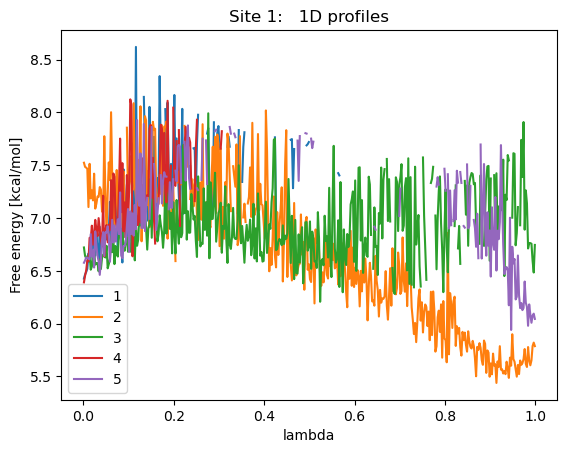

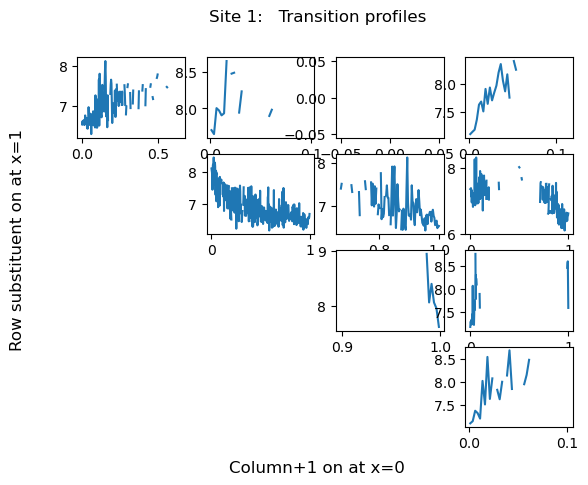

/dfs8/rhayes1_lab/rhayes1/miniconda3/envs/lambda/lib/python3.10/site-packages/mpl_toolkits/mplot3d/proj3d.py:180: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


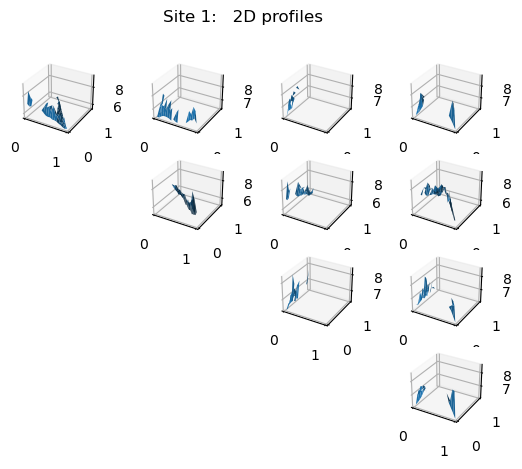

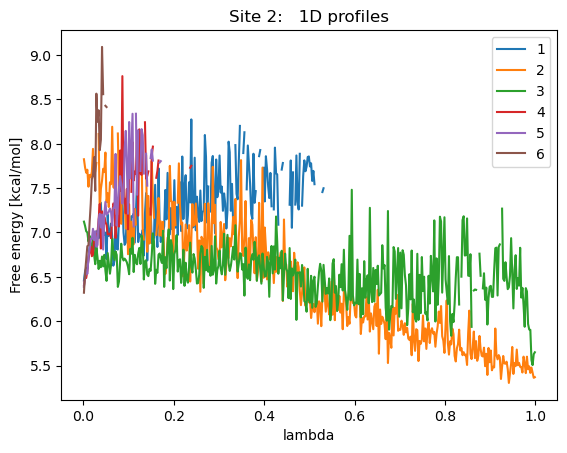

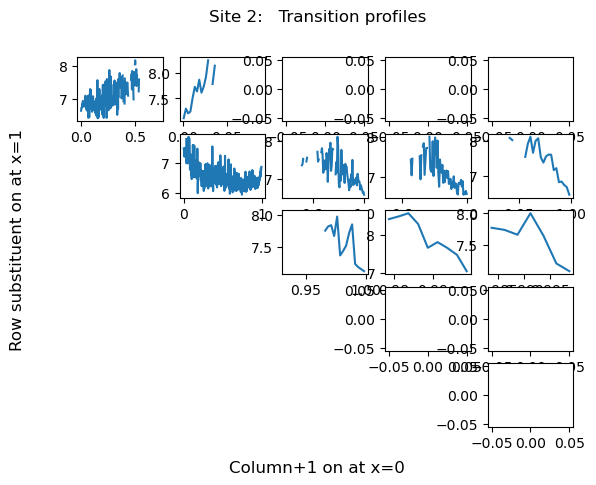

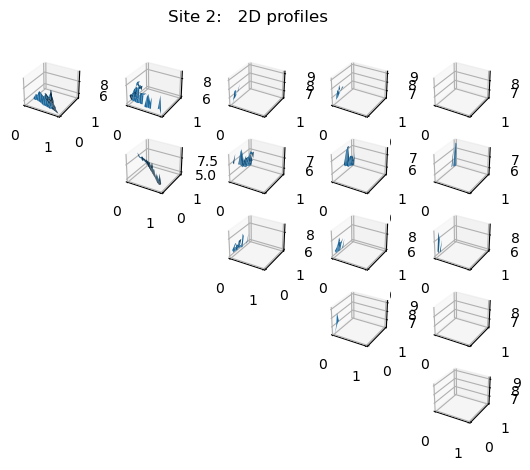

In [3]:
alf.PlotFreeEnergy5('prerun/vacuum/analysis3')

Plot free energy profiles from end of production

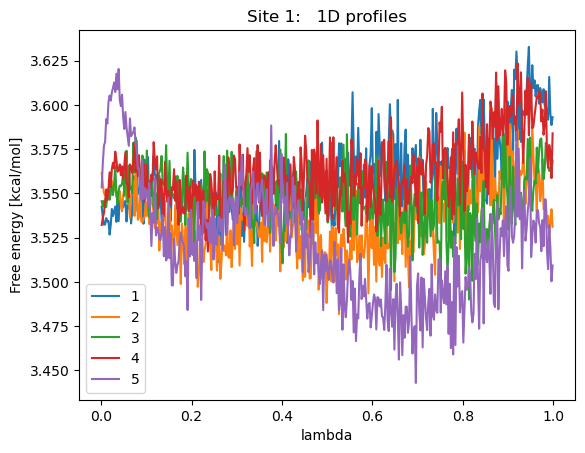

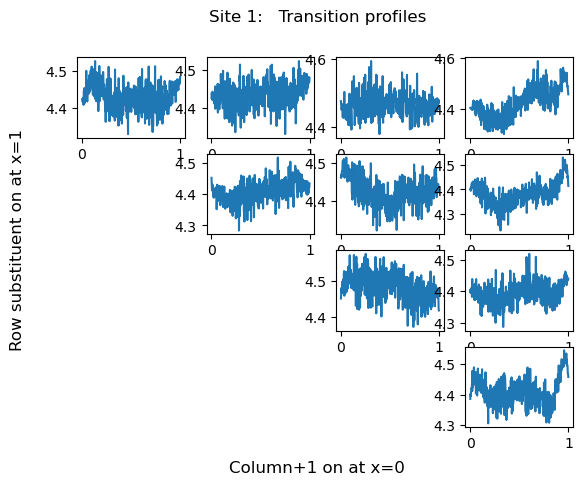

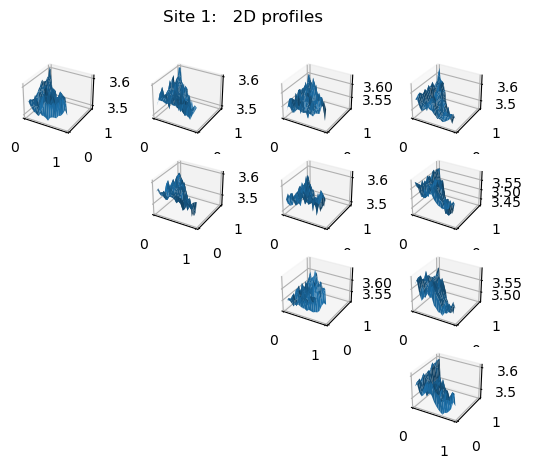

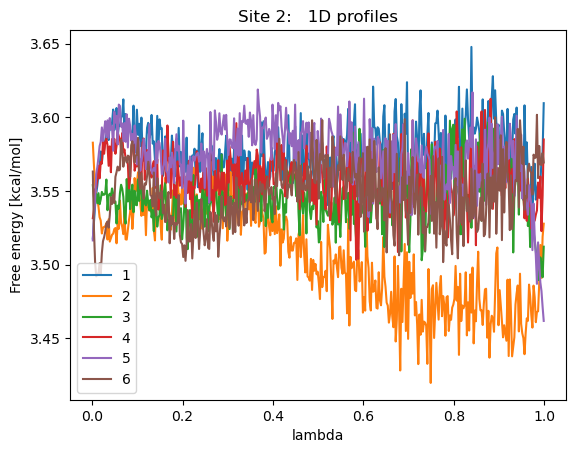

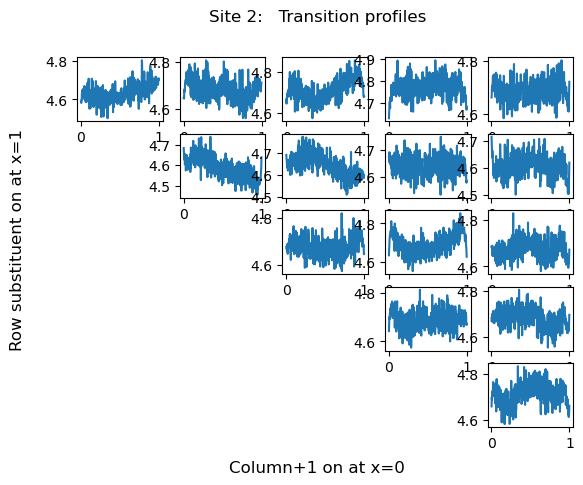

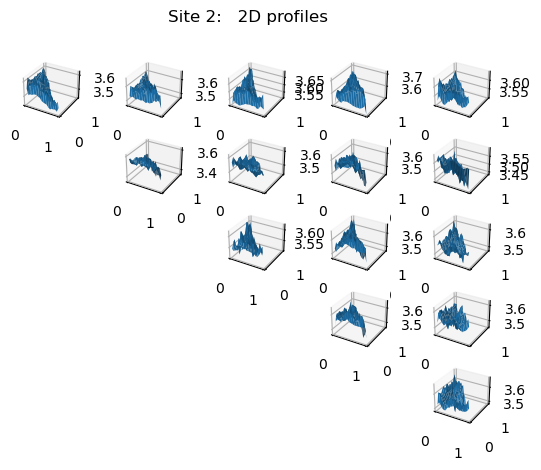

In [4]:
alf.PlotFreeEnergy5('prerun/vacuum/analysis61')

## IV. Biases

Alchemical barriers turn out to have similar shapes, and can be largely flattened with a simple set of biases

### IV.A. Fixed or Linear Bias (b or $\phi$)

With correct parameters, this bias ensures all perturbations at each site are equally populated
$$U_{\text{fixed}}=\sum_{s=1}^M\sum_{i=1}^{N_s} \phi_{si}\lambda_{si}$$

<img src="Figures/Profile/Gphi.jpg" alf="Fixed bias" width=200/>

### IV.B Quadratic Bias (c or $\psi$)

This bias is largely responsible for removing barriers in alchemical space due to electrostatic interactions
$$U_{\text{quad}}=\sum_{s=1}^M\sum_{i=1}^{N_s}\sum_{j=i+1}^{N_s} \psi_{si,sj}\lambda_{si}\lambda_{sj}$$

<img src="Figures/Profile/Gpsi.jpg" alf="Quad bias" width=200/>

### IV.C Skew Bias (x or $\chi$)

Upon the introduction of soft cores the barriers became less symmetric, and this bias fit the residuals beyond the quadratic and end biases well
$$U_{\text{skew}}=\sum_{s=1}^M\sum_{i=1}^{N_s}\sum_{j \neq i}^{N_s} \chi_{si,sj}\lambda_{sj}(1-\exp(\lambda_{si}/0.18))$$

<img src="Figures/Profile/Gchi.jpg" alf="Skew bias" width=200/>

### IV.D End Bias (s or $\omega$)

The end bias pays the entropic and surface tension cost of displacing solvent and nearby molecules to make space for a substituent to appear 
$$U_{\text{end}}=\sum_{s=1}^M\sum_{i=1}^{N_s}\sum_{j \neq i}^{N_s} \omega_{si,sj}\lambda_{sj}\frac{\lambda_{si}}{\lambda_{si}+0.017}$$

<img src="Figures/Profile/Gomega.jpg" alf="End bias" width=200/>

### IV.E Biases Are Stored in Matrices

Each cycle [i] of ALF, previous biases are stored in
* analysis[i]/b_prev.dat
* analysis[i]/c_prev.dat
* analysis[i]/x_prev.dat
* analysis[i]/s_prev.dat

changes to biases are stored in
* analysis[i]/b.dat
* analysis[i]/c.dat
* analysis[i]/x.dat
* analysis[i]/s.dat

and new biases are stored in
* analysis[i]/b_sum.dat
* analysis[i]/c_sum.dat
* analysis[i]/x_sum.dat
* analysis[i]/s_prev.dat

The b, c, x, and s matrices describe the shape of the free energy landscape. Thus, they are opposite in sign from the $\phi$, $\psi$, $\chi$, and $\omega$ parameters required to flatten the landscape.

#### IV.E.1 Final Biases

In [5]:
print('Fixed bias parameters b_sum.dat')
b=np.loadtxt('prerun/vacuum/analysis61/b_sum.dat')
print(b)
print('Site 1')
print(b[0:5])
print('Site 2')
print(b[5:11])
print('Quad bias parameters c_sum.dat')
c=np.loadtxt('prerun/vacuum/analysis61/c_sum.dat')
print(c)
print('Site 1')
print(c[0:5,0:5])
print('Site 2')
print(c[5:11,5:11])
print('Skew bias parameters x_sum.dat')
x=np.loadtxt('prerun/vacuum/analysis61/x_sum.dat')
print(x)
print('Site 1')
print(x[0:5,0:5])
print('Site 2')
print(x[5:11,5:11])
print('End bias parameters s_sum.dat')
s=np.loadtxt('prerun/vacuum/analysis61/s_sum.dat')
print(s)
print('Site 1')
print(s[0:5,0:5])
print('Site 2')
print(s[5:11,5:11])

Fixed bias parameters b_sum.dat
[  0.   -11.64  -6.67   4.84  -9.18   0.   -11.86  -6.78   9.42   4.22
  27.83]
Site 1
[  0.   -11.64  -6.67   4.84  -9.18]
Site 2
[  0.   -11.86  -6.78   9.42   4.22  27.83]
Quad bias parameters c_sum.dat
[[ 0.    1.87  1.2  -2.17 14.49  0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    2.56 -1.14 15.86  0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.   -2.26 15.33  0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.   11.12  0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    1.69  0.91  2.12 14.74  4.85]
 [ 0.    0.    0.    0.    0.    0.    0.    4.34  2.55 15.64  7.51]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    2.12 14.58  5.72]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.   14.89  6.03]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   19.02]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]]
Si

Notes:
* b(site 1, sub 1) and b(site 2, sub 1) are zero because $\sum_i^{N_s} \lambda_{si}=1$
* c is upper triangular because quadratic bias is symmetric
* s or $\omega$ biases are near zero because this is the vacuum side of the solvation free energy calculation, and there is no solvent to push out of the way. Typically s biases are a little under 1 kcal/mol per heavy atom

## V. Algorithm Overview

Many cycles of flattening are required because the shape of the free energy profile only becomes clear once biases are near optimal. However, even with poor biases the direction in which to change biases is quite clear from the parts of profiles that are sampled. Thus many cycles of ALF are run. Each cycle consists of molecular dynamics sampling followed by estimation of new bias parameters. Early cycles are very short to avoid wasting computational resources. Simulations get longer as the biases improve.

ALF may be run using the following high level routines:
* alf.initialize()
* alf.runflat()
* alf.runprod()
* alf.postprocess()

Users who desire or require more fine-grained control may examine these high level routines to appropriately call the low level routines upon which they rely.

### V.A. Documentation

The ALF package was documented in detail recently. Read the README.md for an overview of how to use it. Modules and routines are described in docstrings, which can be read by calling `help(alf)` or `help(alf.runflat)` in python. There are several examples of how to use ALF in the examples directory with an INSTRUCTIONS file describing how to run them, and I expect to refine and add examples in the coming weeks.

### V.B. alf.initialize()

Set initial values for biases

In [6]:
help(alf.initialize)

Help on function initialize in module alf.initialize:

initialize(engine='charmm', minimize=True)
    set up the initial data structures required by runflat
    
    This function sets up the files required for the first run of runflat.
    It expects a prep directory formatted according to the specifications
    in README.md. The data These files required by runflat are analysis0,
    which contains starting values of 0 for all the bias parameters,
    variables1.inp which formats those biases to be read by the MD engine,
    and nbshift, which described how the bias parameters change for
    neighboring replicas when using replica exchange. Note that while
    the contents of nbshift are irrelevant if not using replica exchange,
    GetEnergy still requires that they be present. This routine calls the
    InitVars routine.
    
    Parameters
    ----------
    engine : str, optional
        The molecular dynamics engine string, see help(alf) for allowed
        values. (default is '

### V.C. alf.runflat()

Runs several cycles of flattening

In [7]:
help(alf.runflat)

Help on function runflat in module alf.runflat:

runflat(ni, nf, esteps, nsteps, engine='charmm', G_imp=None, ntersite=[0, 0])
    Run several cycles of short simulations followed by bias optimization
    
    runflat runs many short cycles of simulation followed by flattening. It
    assumes the existence of a directory prep, described in the README.md
    file, and that initialize has been run first to create the
    variables1.inp and analysis0 directories (along with nbhift) equired to
    start the first run. Each cycle [i] a run directory is created called
    run[i], the MD engine is launched with the msld_flat.inp script (you
    may write your own, otherwise a default script will be copied from
    alf/default_scripts), and the alchemical trajectory is saved to
    run[i]/res/[name]_flat.lmd, where [name] is the name of the system in
    alf_info (if you write your own script, make sure the trajectory is
    saved here, similar naming conventions apply for the spatial trajecto

### V.D. alf.runprod()

Run several chunks of a production run. Saves progress in chunks, usually 1 ns each.

In [8]:
help(alf.runprod)

Help on function runprod in module alf.runprod:

runprod(step, a, itt0, itt, nsteps=500000, engine='charmm')
    run a longer production run of lambda dynamics
    
    runprod runs production lambda dynamics simulations. The routine assumes
    the existence of a prep directory whose format is specified in
    README.md. It is run as if it were another cycle [i] of flattening,
    where [i] is given by the input parameter [step], so analysis[i-1] and
    variables[i].inp are also assumed to exist. Dynamics is run using the
    MD engine input script msld_prod.inp which can be written by the user,
    or will be copied from the default scripts in alf/default_scripts if
    none exists. This input script should take in arguments nsteps for the
    number of MD steps to run per chunk, itt for the index of the current
    chunk (starting at 1) and write lambda trajectories to
    run[i][a]/res/[name]_prod[itt].lmd, where [i] is the cycle index, [a] is
    the duplicate independent trial i

### V.E. alf.postprocess()

Reoptimize biases and evaluate $\Delta G$ upon chemical transformation from a production run by alf.runflat. The difference between $\Delta G$ in two different ensembles gives the relative free energy $\Delta \Delta G$.

In [9]:
help(alf.postprocess)

Help on function postprocess in module alf.postprocess:

postprocess(i, eqS, S, N, skipE=1, boolflat=True, engine='charmm', G_imp=None, ntersite=[0, 0])
    analyze a longer production run from runflat for improved biases and dG
    
    postprocess analyzes productions simulations run by runprod. As
    described in the documentation for runprod, runprod is run on a cycle of
    flattening [i], on several independent trials with letter indices [a],
    in several chunks [itt] typically of 1 ns each, with alchemical
    trajectories saved in run[i][a]/res/[name]_prod[itt].lmd, where [name]
    is the name of the system in alf_info. postprocess analyzes these
    alchemical trajectories, discarding some (typically the first quarter)
    for equilibration. The routine estimates new biases in a similar fashion
    to runflat, using the GetLambdas, GetEnergy, RunWham, GetFreeEnergy5,
    and SetVars routines, but only analyzing the independent trials from
    this cycle of flattening/produ

### V.F. Launching an ALF run

ALF is often run through slurm scripts on a cluster. The file `subsetAll.sh` is designed to submit an entire ALF workflow to the queue and set dependencies between jobs and job array elements appropriately. It uses the following environment variables, which you may set through this tutorial to suit your cluster. `subsetAll.sh` and the slurm scripts it submits may be found in the examples/engines directory of ALF.

In [11]:
os.environ['SLURMOPTSMD']='--time=240 --ntasks=1 --tasks-per-node=1 --cpus-per-task=1 -p gpu --gres=gpu:1 --export=ALL'
os.environ['SLURMOPTSPP']='--time=240 --ntasks=1 --tasks-per-node=1 --cpus-per-task=1 -p gpu --gres=gpu:1 --export=ALL'

In [13]:
os.chdir(alf_tutorial_dir+'/vacuum')
!./subsetAll.sh
os.chdir(alf_tutorial_dir)

One could achieve comparable results without slurm by running

Typically initial flattening runs are 0.1 ns. For this system 50 of these runs are sufficient. 100 cycles is sufficient for most systems. Some strongly charged perturbations like arginine mutations require 200 cycles. Next 10 cycles of 1 ns are typically run to further refine flattening. Then typically 5 independent trials are run for production. In this system and many solvation free energy calculations 10 ns is sufficient. In well behaved ligand and protein mutation systems 20-40 ns is sufficient. In poorly behaved systems 100 ns may be required. Larger numbers of perturbation sites typically increase sampling requirements. The largest system simulated yet with 15 perturbation sites required 12 independent trials of 400 ns for convergence.

## VI. Algorithm Details

### VI.A. Input Format

In ALF, everything system specific is placed inside a directory called prep. The prep directory should contain:
* alf_info.py : a file containing a python dictionary of basic info ALF needs
* 14benz.py : a file setting up the system on the molecular dynamics engine of choice; the name of this file varies
* etc... : all supporting files required by 14benz.py

Detailed instructions for how to prepare these prep directories for several applications of interest will be provided over the next several days.

#### VI.A.1. alf_info.py

In [10]:
!cat vacuum/prep/alf_info.py

import numpy as np
import os
alf_info={}
alf_info['name']='14benz'
alf_info['nsubs']=[5,6]
alf_info['nblocks']=np.sum(alf_info['nsubs'])
alf_info['ncentral']=0
alf_info['nreps']=1
alf_info['nnodes']=1
alf_info['enginepath']=os.environ['CHARMMEXEC']
alf_info['temp']=298.15


The fields are as follows:
* name : a name for the system; ALF will look for the setup file in name.py
* nsubs : a python list of the number of substituents at each perturbation site; the length of this list is the number of perturbation sites
* nblocks : the total number of perturbations at all sites
* ncentral : for use with replica exchange, set to 0 if not using replica exchange
* nreps : for use with replica exchange, set to 1 if not using replica exchange
* nnodes : for parallelization to multiple GPUs, values greater than 1 do not provide significant benefit for most applications
* enginepath : the path to the molecular dynamics engine executable; not used with pyCHARMM
* temp : the system temperature in Kelvin
* q : an optional field that should be set for charge changing perturbations, which is a list containing the charge of each substituent

#### VI.A.2 14benz.py

In [11]:
!cat vacuum/prep/14benz.py

##
## pyCHARMM script drafted from many examples
##
##   ** MSLD with BLADE (no OMM support) **
##

##############################################
# Set up global parameters

# variables
box = 32.964000
pmegrid = 32

# msld variables
fnex = 5.5

nsites=len(nsubs)

##############################################
# Read in toppar files, coordinate files, etc.

# toppar files
read.rtf('prep/top_all36_msld.rtf')
read.rtf('prep/full_ligand.rtf',append=True)
read.prm('prep/par_all36_msld.prm',flex=True)
read.prm('prep/full_ligand.prm',flex=True,append=True)

ligseg = 'LIG' 
resnum = '1'
read.sequence_pdb('prep/full_ligand.pdb')
gen.new_segment(ligseg,setup_ic=True)
read.pdb('prep/full_ligand.pdb',resid=True)

solvated=False
if solvated==True:
  read.sequence_pdb('prep/solvent.pdb')
  gen.new_segment('WT00',setup_ic=True,angle=False, dihedral=False)
  read.pdb('prep/solvent.pdb',resid=True)

# bomblev -1  ! JZV

#  Hybrid Ligand Setup
#  (1) read in patch files
for i in range(len(nsubs)):
  fo

This pyCHARMM script proceeds through several of the steps common to most setups on pyCHARMM
* Reading in rtf (residue topology file) and prm (parameter) files
* Generating a psf (protein structure file) by reading sequences (here with read.sequence_pdb)
* Applying alchemical patches (here using lingo to submit commands like `patch p1_1 LIG 1 setup`)
* Defining selections (conventionally with names like site1sub1 to reference alchemical groups)
* Setting up the box (crystal.define_cubic() and image commands)
* Setting up the block module (with lingo)

The block module of CHARMM defines the alchemical portion of the calculation. However, the block module has not been effectively ported to pyCHARMM yet, so it is written as a single large script submitted through lingo. (Lingo allows one to submit commands to pyCHARMM using the original CHARMM scripting language). The "call" commands assign selections of atoms to various alchemical groups. The "ldin" commands set initial conditions, and also read the linear biases. The "ldbi" and "ldbv" commands read in the quadratic, skew, and end biases from their matrices.

#### VI.A.3 etc...

In [12]:
!ls vacuum/prep

14benz.py	     site1_sub3_frag.pdb  site2_sub4_frag.pdb
alf_info.py	     site1_sub3_pres.rtf  site2_sub4_pres.rtf
cubic.xtl	     site1_sub4_frag.pdb  site2_sub5_frag.pdb
full_ligand.pdb      site1_sub4_pres.rtf  site2_sub5_pres.rtf
full_ligand.prm      site1_sub5_frag.pdb  site2_sub6_frag.pdb
full_ligand.rtf      site1_sub5_pres.rtf  site2_sub6_pres.rtf
nbond.str	     site2_sub1_frag.pdb  site2_sub7_frag.pdb
par_all36_msld.prm   site2_sub1_pres.rtf  site2_sub7_pres.rtf
site1_sub1_frag.pdb  site2_sub2_frag.pdb  solvent.pdb
site1_sub1_pres.rtf  site2_sub2_pres.rtf  top_all36_msld.rtf
site1_sub2_frag.pdb  site2_sub3_frag.pdb
site1_sub2_pres.rtf  site2_sub3_pres.rtf


### VI.B. ALF Output

Outside the prep directory is where the output appears. This includes run[i] directories where the molecular dynamics simulations of ALF cycle [i] are performed, analysis[i] directories where new biases are estimated from the sampling recorded in run[i], and variables[i+1].py where these biases are saved to be read into pyCHARMM on the next cycle of dynamics.

In [2]:
!ls vacuum

msld_flat.py  postprocess.sh  runflat.sh  subsetAll.sh
msld_prod.py  prep	      runprod.sh


### VI.C. Molecular Dynamics

ALF supports several molecular dynamics engines. The engine being used is passed to routines like alf.initialize and alf.runflat as an optional parameter named engine. Currently supported engines include
* charmm : CHARMM script using domdec for gpu acceleration
* bladelib : CHARMM script using BLaDE for gpu acceleration
* blade : BLaDE script using standalone BLaDE
* pycharmm : pyCHARMM python script using BLaDE for gpu acceleration

We hope to eventually support OpenMM. System setup is very similar in other engines, but some python scripts ending in .py become CHARMM scripts ending in .inp. If you are more comfortable with CHARMM scripting than with pyCHARMM, you may wish to consider the charmm or bladelib engines.

You may have noticed there were no energy, minimization, or dynamics commands in prep/14benz.py. That is because the prep/14benz.py script is called by another pyCHARMM script, msld_flat.py for short flattening runs or msld_prod.py for longer production runs. These scripts contain the system independent parts of a $\lambda$ dynamics molecular dynamics simulation. If these scripts do not exist, default versions of them are copied from alf/default_scripts. If the scripts do exist, they are not overwritten, because sometimes small edits are necessary (here I've edited these files to change cutoffs in both ensembles and run constant volume instead of constant pressure in the vacuum ensemble).

In [13]:
!cat vacuum/msld_flat.py

##
## pyCHARMM script drafted from many examples
##
##   ** MSLD with BLADE (no OMM support) **
##

import os
import sys
import numpy as np
import pandas

##############################################
# Load pyCHARMM libraries

import pycharmm
import pycharmm.generate as gen
import pycharmm.ic as ic
import pycharmm.coor as coor
import pycharmm.energy as energy
import pycharmm.dynamics as dyn
import pycharmm.nbonds as nbonds
import pycharmm.minimize as minimize
import pycharmm.crystal as crystal
import pycharmm.image as image
import pycharmm.psf as psf
import pycharmm.read as read
import pycharmm.write as write
import pycharmm.settings as settings
import pycharmm.cons_harm as cons_harm
import pycharmm.cons_fix as cons_fix
import pycharmm.select as select
import pycharmm.shake as shake
import pycharmm.scalar as scalar
from pycharmm.lib import charmm as libcharmm


##############################################
# Set up global parameters

# nonbonded conditions
nb_fswitch = False        

Note that after loading pyCHARMM, this script begins by running any arguments passed by ALF (arguments.py), reading in the bias and alf_info parameters (variablesflat.py), and setting up the system (prep/14benz.py).

In runflat.py, an optional minimization is performed on the first cycle of ALF. In runflat.py, two segments of dynamics are called, esteps of equilibration and nsteps of sampling. In runprod.py, only one segment of dynamics is called to run a chunk of dynamics, but that chunk starts from the restart file of the previous chunk. An appropriate number of chunks should be discarded for equilibration.

### VI.D. alf.GetLambdas

Walk through a cycle of flattening to see what is going on.

In [15]:
!ls prerun/vacuum/analysis4 # does not exist before this analysis

ls: cannot access 'prerun/vacuum/analysis4': No such file or directory


In [11]:
os.chdir(alf_tutorial_dir+'/prerun/vacuum')
alf_info=alf.initialize_alf_info('pycharmm')
G_imp=alf_tutorial_dir+'prerun/G_imp'
i=4

# Prep the analysis directories
print('analysis%d started' % i)
if not os.path.exists('analysis%d' % i):
  os.mkdir('analysis%d' % i)
shutil.copy('analysis%d/b_sum.dat' % (i-1),'analysis%d/b_prev.dat' % i)
shutil.copy('analysis%d/c_sum.dat' % (i-1),'analysis%d/c_prev.dat' % i)
shutil.copy('analysis%d/x_sum.dat' % (i-1),'analysis%d/x_prev.dat' % i)
shutil.copy('analysis%d/s_sum.dat' % (i-1),'analysis%d/s_prev.dat' % i)
np.savetxt('analysis%d/nsubs' % i,np.array(alf_info['nsubs']).reshape((1,-1)),fmt=' %d')

if not os.path.exists('analysis%d/G_imp' % i):
  if not G_imp:
    G_imp_dir=os.path.dirname(os.path.abspath(__file__))+'/G_imp'
  else:
    G_imp_dir=G_imp
  os.symlink(G_imp_dir,'analysis%d/G_imp' % i)
os.chdir('analysis%d' % i)

# Run the analysis
alf.GetLambdas(alf_info,i)

os.chdir(alf_tutorial_dir)

analysis4 started


* Copy previous biases into current analysis directory (in this case analysis4).
* Link the G_imp directory to a precomputed directory. The implicit constraints are a nonlinear mapping from $\theta$ space to $\lambda$ space, so sampling will be non-uniform in $\lambda$ space due to implicit constraints. $\lambda$ values near physical end states are sampled more. Subtract the free energy of implicit constraints before flattening so we don't get rid of this desirable feature by flattening
* alf.GetLambdas copies alchemical trajectory from binary format in run4/res/14benz_flat.lmd into human readable format in analysis4/data/Lambda.0.0.dat

<img src="Figures/ImpCons/G1_6.jpg" alf="Gimp" width=250/>

In [19]:
!ls prerun/vacuum/analysis4/data
!head prerun/vacuum/analysis4/data/Lambda.0.0.dat

Lambda.0.0.dat
  0.003772   0.310744   0.685236   0.000043   0.000205   0.000044   0.233446   0.766090   0.000100   0.000030   0.000291
  0.006840   0.512476   0.480218   0.000082   0.000385   0.000090   0.396075   0.603646   0.000057   0.000022   0.000109
  0.008970   0.693534   0.296965   0.000123   0.000408   0.000228   0.545221   0.454447   0.000031   0.000017   0.000057
  0.007124   0.723370   0.268896   0.000175   0.000434   0.000881   0.684080   0.314973   0.000019   0.000015   0.000033
  0.004603   0.777574   0.217103   0.000262   0.000458   0.004477   0.778961   0.216507   0.000016   0.000015   0.000023
  0.002045   0.650141   0.346922   0.000395   0.000497   0.018116   0.843238   0.138596   0.000015   0.000018   0.000017
  0.000596   0.306318   0.691934   0.000532   0.000620   0.058127   0.839822   0.102003   0.000016   0.000018   0.000014
  0.000280   0.200211   0.797776   0.000816   0.000916   0.128489   0.790909   0.080556   0.000017   0.000014   0.000015
  0.000271   0.29

### VI.E. alf.GetEnergy

In early testing of ALF, sometimes ALF would change a biasing parameter, sampling would shift, and ALF would immediately change it back, because it effectively had no memory of why it made changes in previous cycles. To deal with this, sampling from the previous 5 cycles is agregated together. This gives a more comprehensive view of the landscape. Including significantly more than the previous 5 cycles was found to cause artifacts because older simulations far from equilibrium were treated on the same footing as more recent simulations with better biases, leading to distorted estimates of the landscape. The previous 5 cycles were all run with different biasing potentials, so they are combined with WHAM/MBAR. The WHAM/MBAR equations require the energies of each alchemical trajectory in each of the 5 biases that were used. alf.GetEnergy computes these energies.

In [14]:
os.chdir(alf_tutorial_dir+'/prerun/vacuum/analysis4')
im5=1

alf.GetEnergy(alf_info,im5,i)

os.chdir(alf_tutorial_dir)

The previous 5 alchemical trajectories are copied into analysis4/Lambda, and the relative energies are saved in analysis4/Energy.

In [ ]:
!ls prerun/vacuum/analysis4/Lambda
!ls prerun/vacuum/analysis4/Energy

### VI.F. alf.RunWham

alf.RunWham is a python wrapper for the GPU code compiled in the alf/wham directory during installation. This code does most of the heavy lifting of the bias optimization.

First, the output of alf.GetEnergy is used to reweight all the alchemical trajectory frames from the the previous 5 (or in this case 4) simulations using WHAM/MBAR.

Next, free energy profiles like those plotted above are computed by binning.

A penalty function
$$E=\sum_p^{\text{Profiles}}\sum_b^{\text{Bins}}\frac{k_{pb}}{2}(G_{pb}-G_{pb}^{\text{imp}}-\bar{G}_p)^2$$
penalizes deviations of each point $G_{pb}$ at bin $b$ on profile $p$ from the average value of that profile $\bar{G}_p$ (after subtracting off the implicit constraint free energy $G_{pb}^{\text{imp}}$ for that point). The $k_{pb}$ term is used to more tightly restrain some profiles (the 1-D profiles), and some bins (the endpoint bins) to the average value.

Changing the bias parameters changes the weights output by WHAM/MBAR, which in turn changes $G_{pb}$. The effect of the bias parameters on each $G_{pb}$ is nonlinear, which gives rise to a nonlinear optimization problem. To simplify the problem, the nonlinear dependence of $G_{pb}$ on the bias parameters is approximated as linear. If the bias parameters $\phi$, $\psi$, $\chi$, and $\omega$ are collectively referred to as $\alpha_i$, $G_{pb}$ may be approximated as
$$G_{pb}(\{\alpha_i\}) \approx G_{pb} + \sum_i^{\text{Biases}}\Delta \alpha_i \frac{\partial G_{pb}}{\partial \alpha_i}$$
A regularization term $\sum_i 0.5 k_i \Delta {\alpha_i}^2$ is added by the next routine alf.GetFreeEnergy5 to prevent excessively large changes in the biases.

This reduces the penalty function $E$ to a quadratic function of the changes in the biases $\Delta \alpha_i$, and the optimum of this quadratic function is given by a system of linear equations
$$C\Delta\alpha=V$$
The matrix $C$ and vector $V$ are written to analysis4/multisite/C.dat and analysis4/multisite/V.dat.

In [15]:
os.chdir(alf_tutorial_dir+'/prerun/vacuum/analysis4')
N=i-im5+1
ntersite=[0,0]

fpout=open('output','w')
fperr=open('error','w')
subprocess.call([shutil.which('python'),'-c','import alf; alf.RunWham(%d,%f,%d,%d)' % (N*alf_info['nreps'],alf_info['temp'],ntersite[0],ntersite[1])],stdout=fpout,stderr=fperr)

os.chdir(alf_tutorial_dir)

In [20]:
!ls prerun/vacuum/analysis4/multisite/C.dat
!ls prerun/vacuum/analysis4/multisite/V.dat

prerun/vacuum/analysis4/multisite/C.dat
prerun/vacuum/analysis4/multisite/V.dat


### VI.G. alf.GetFreeEnergy5

alf.GetFreeEnergy5 takes the $C$ matrix and $V$ vector given by alf.RunWham, adds regularization terms, inverts $C$, and solves for $\Delta \alpha$. If any $\alpha_i$ parameter changes by more than a maximum value, all changes are scaled down such that no change exceeds its cap. Changes are saved to analysis4/b.dat, analysis4/c.dat, analysis4/x.dat, and analysis4/s.dat

In [16]:
os.chdir(alf_tutorial_dir+'/prerun/vacuum/analysis4')

alf.GetFreeEnergy5(alf_info,ntersite[0],ntersite[1])

os.chdir(alf_tutorial_dir)

scaling is:
1


In [22]:
!cat prerun/vacuum/analysis4/b.dat

    0.00    -0.63    -0.44     1.12    -0.63     0.00    -1.83    -1.88    -0.03     0.37     0.09


Note that substituents 2 and 3 at both sites 1 and 2 which were oversampled have negative b changes to drive sampling to other substituents.

### VI.H. alf.SetVars

With the hard work done, alf.SetVars saves the bias variables into a format readable by the MD engine through msld_flat.py

In [17]:
os.chdir(alf_tutorial_dir+'/prerun/vacuum/analysis4')

alf.SetVars(alf_info,i+1)

os.chdir(alf_tutorial_dir)

In [18]:
!ls prerun/vacuum/variables5.py
!head prerun/vacuum/variables5.py

prerun/vacuum/variables5.py


### VI.I. Production and Postprocessing

In flattening by alf.runflat, dynamics and bias optimization alternate many times within a single slurm script. In production, alf.runprod performs dynamics and alf.postprocess performs bias optimization and free energy estimation.

Typically 5 independent trials are run by alf.runprod during production using the same biases in order to estimate the statistical precision of the results. Each of these simulations is run with a different tag, a, b, c, d, or e. In addition, each production is divided into several cycles, typically of 1 ns each, and each call of alf.runprod is responsible for some number of these cycles (in this case 5). This makes it easy to submit production simulations that would run longer than a cluster time limit with a slurm job array where each element is significantly shorter than the time limit.

alf.postprocess follows largely the same flattening algorithm as alf.runflat, but in addition uses the routine alf.GetVariance to estimate free energies. Free energies are estimated by
$$G_i - G_0 = -k_BT \ln(P_i/P_0) -(\phi_i-\phi_0)$$
where $P_i$ is the fraction of the time ligand $i$ was sampled, $P_0$ is the fraction of the time the reference ligand was sampled, and the excess free energy contributed by the biases to each state is subtracted off. Statistical uncertainties for these free energies are estimated by bootstrapping from the 5 independent trials.

### VI.J. Robustness

The implementation of ALF is designed to be robust against interruptions such as simulation crashes and node failure. During alf.runflat, each cycle is repeatedly attempted until it succeeds (judged by the presence of analysis[i]/b.dat). If the slurm job goes down, alf.runflat may be relaunched and ALF will resume at the first incomplete cycle. During alf.runprod, each 1 ns chunk is attempted until it succeeds (judged by the presence of an alchemical trajectory containing the correct number of frames), and if previous instances of alf.runprod did not complete their chunks, the current instance will go back and redo their chunks.

## VII. Results

The $\Delta G$ for an alchemical process in one physical ensemble given by alf.postprocess using alf.GetVariance has little meaning unless it is compared to the $\Delta G$ of that same chemical process in another physical ensemble. The difference $\Delta \Delta G$ is the relative free energy of interest.

<img src="Figures/CycleBoth.jpg" alf="cycle" width=400/>

In [5]:
!echo vacuum
!cat prerun/vacuum/analysis61/Result.txt
!echo solvent
!cat prerun/solvent/analysis61/Result.txt

import math

fp1=open("prerun/vacuum/analysis61/Result.txt","r")
fp2=open("prerun/solvent/analysis61/Result.txt","r")
fp3=open("prerun/Result.txt","w")

lines1=fp1.readlines()
lines2=fp2.readlines()

nsites=len(lines1[0].split())-3
for i in range(0,len(lines1)):
  line1=lines1[i].split()
  line2=lines2[i].split()

  i1=[]
  for j in range(0,nsites):
    i1.append(int(line1[j]))
  V=float(line2[nsites])-float(line1[nsites])
  E=math.sqrt(float(line2[nsites+2])**2 + float(line1[nsites+2])**2)

  for j in range(0,nsites):
    fp3.write("%2d " % (i1[j],))
  fp3.write("%8.3f +/- %5.3f\n" % (V,E))

fp1.close()
fp2.close()
fp3.close()

!echo ddG
!cat prerun/Result.txt

vacuum
 0  0    0.000 +/- 0.031
 0  1  -11.875 +/- 0.032
 0  2   -6.807 +/- 0.116
 0  3    9.297 +/- 0.091
 0  4    4.136 +/- 0.079
 0  5   27.947 +/- 0.120
 1  0  -11.800 +/- 0.064
 1  1  -23.530 +/- 0.062
 1  2  -18.563 +/- 0.047
 1  3   -1.968 +/- 0.079
 1  4   -6.983 +/- 0.069
 1  5   16.026 +/- 0.098
 2  0   -6.773 +/- 0.122
 2  1  -18.611 +/- 0.052
 2  2  -13.415 +/- 0.027
 2  3    2.693 +/- 0.054
 2  4   -2.389 +/- 0.035
 2  5   21.098 +/- 0.074
 3  0    4.912 +/- 0.052
 3  1   -7.109 +/- 0.053
 3  2   -1.919 +/- 0.113
 3  3   14.300 +/- 0.079
 3  4    9.061 +/- 0.028
 3  5   32.750 +/- 0.085
 4  0   -9.108 +/- 0.058
 4  1  -21.114 +/- 0.050
 4  2  -15.935 +/- 0.055
 4  3    0.172 +/- 0.059
 4  4   -4.979 +/- 0.053
 4  5   18.677 +/- 0.031
solvent
 0  0    0.000 +/- 0.126
 0  1  -16.125 +/- 0.201
 0  2   -6.522 +/- 0.077
 0  3    6.468 +/- 0.072
 0  4   -0.146 +/- 0.103
 0  5   26.936 +/- 0.062
 1  0  -16.314 +/- 0.115
 1  1  -32.064 +/- 0.107
 1  2  -22.516 +/- 0.136
 1  3   -9

## VIII. Further Practice

* Run the solvent side of the calculation 1,4-substituted-benzene solvation free energy calculation in the solvent directory
* Read the INSTRUCTIONS file in the ALF respository examples directory, and use the bladelib engine to run the unfolded side of T4 lysozyme (from the directory examples/systems/prep_T4L149U_charmm)